In [376]:
import matplotlib.pyplot as plt
import numpy as np

In [377]:
path = './losses'

In [378]:
model_type = 'NNnph'
case = 'iid'
local_epochs = 1
what = 'global'

(-4.95, 103.95, 0.75, 10.0)

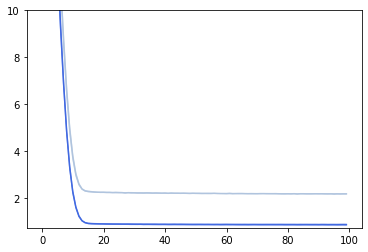

In [379]:
filename = f'{path}/{what}_val_loss_M{model_type}C{case}L{local_epochs}.npy'
losses = np.load(filename)
mean = losses.mean(axis=0)
std = losses.std(axis=0)
color=['royalblue','limegreen','purple','goldenrod']
if what == 'local':
    for i,m in enumerate(mean):
        plt.plot(range(100),m, color=color[i])
        plt.fill_between(range(100), m - std[i], m + std[i], alpha=0.5, color=color[i])
else:
    plt.plot(range(100),mean, color=color[0])
    plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

# plt.plot(mean, range(100))

# plt.fill_between(range(100), mean - std, mean + std)

filename = f'{path}/{what}_train_loss_M{model_type}C{case}L{local_epochs}.npy'
losses = np.load(filename)

mean = losses.mean(axis=0)
std = losses.std(axis=0)
color=['lightsteelblue','palegreen','plum','wheat']
if what == 'local':
    for i,m in enumerate(mean):
        plt.plot(range(100),m, color[i])
        plt.fill_between(range(100), m - std[i], m + std[i], alpha=0.5, color=color[i])
else:
    plt.plot(range(100),mean, color[0])
    plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0.75,10))
# # plt.legend(['a','b','c','d'])